# Task 2; Basic Data Analysis

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("michaelmatta0/global-development-indicators-2000-2020")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/global-development-indicators-2000-2020


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/kaggle/input/global-development-indicators-2000-2020/Global_Development_Indicators_2000_2020.csv'
df = pd.read_csv(file_path)

In [3]:
# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   year country_code                 country_name region income_group  \
0  2000          AFE  Africa Eastern and Southern    NaN          NaN   
1  2001          AFE  Africa Eastern and Southern    NaN          NaN   
2  2002          AFE  Africa Eastern and Southern    NaN          NaN   
3  2003          AFE  Africa Eastern and Southern    NaN          NaN   
4  2004          AFE  Africa Eastern and Southern    NaN          NaN   

  currency_unit       gdp_usd   population  gdp_per_capita  inflation_rate  \
0           NaN  2.839525e+11  398113044.0      713.245921        8.601485   
1           NaN  2.588432e+11  408522129.0      633.608789        5.840354   
2           NaN  2.648950e+11  419223717.0      631.870340        8.763752   
3           NaN  3.526921e+11  430246635.0      819.743981        7.449700   
4           NaN  4.388756e+11  441630149.0      993.762711        5.023421   

   ...  education_health_ratio  years_since_2000  years_since_c

In [4]:
# Explore dataset structure
print("\nDataset structure:")
print(df.info())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 5556 non-null   int64  
 1   country_code                         5556 non-null   object 
 2   country_name                         5556 non-null   object 
 3   region                               4548 non-null   object 
 4   income_group                         4527 non-null   object 
 5   currency_unit                        4548 non-null   object 
 6   gdp_usd                              5332 non-null   float64
 7   population                           5556 non-null   float64
 8   gdp_per_capita                       5332 non-null   float64
 9   inflation_rate                       4746 non-null   float64
 10  unemployment_rate                    4926 non-null   float64
 11  fdi_pct_gd

In [5]:
# Check missing values
print("\nMissing values summary:")
print(df.isnull().sum())


Missing values summary:
year                                      0
country_code                              0
country_name                              0
region                                 1008
income_group                           1029
currency_unit                          1008
gdp_usd                                 224
population                                0
gdp_per_capita                          224
inflation_rate                          810
unemployment_rate                       630
fdi_pct_gdp                             545
co2_emissions_kt                       1022
energy_use_per_capita                  2621
renewable_energy_pct                    748
forest_area_pct                         113
electricity_access_pct                  401
life_expectancy                         600
child_mortality                         504
school_enrollment_secondary            1800
health_expenditure_pct_gdp              870
hospital_beds_per_1000                 2873
physici

In [6]:
# Data cleaning
# Drop columns with >50% missing values
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1).copy()


In [7]:
# Fill numerical missing values with median
num_cols = df_cleaned.select_dtypes(include=np.number).columns
df_cleaned.loc[:, num_cols] = df_cleaned.loc[:, num_cols].fillna(df_cleaned.loc[:, num_cols].median())

In [8]:
# Fill categorical missing values with mode
cat_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna(df_cleaned[cat_cols].mode().iloc[0])

In [9]:
# Fill categorical missing values with mode
cat_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna(df_cleaned[cat_cols].mode().iloc[0])

In [10]:
# Drop remaining rows with missing values (if any)
df_cleaned = df_cleaned.dropna()

In [11]:
# Verify cleaning results
print("\nAfter cleaning:")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")
print("\nRemaining missing values:")
print(df_cleaned.isnull().sum())


After cleaning:
Original shape: (5556, 47)
Cleaned shape: (5556, 45)

Remaining missing values:
year                                   0
country_code                           0
country_name                           0
region                                 0
income_group                           0
currency_unit                          0
gdp_usd                                0
population                             0
gdp_per_capita                         0
inflation_rate                         0
unemployment_rate                      0
fdi_pct_gdp                            0
co2_emissions_kt                       0
energy_use_per_capita                  0
renewable_energy_pct                   0
forest_area_pct                        0
electricity_access_pct                 0
life_expectancy                        0
child_mortality                        0
school_enrollment_secondary            0
health_expenditure_pct_gdp             0
internet_usage_pct                     0
m

# Task 3: Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set style
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

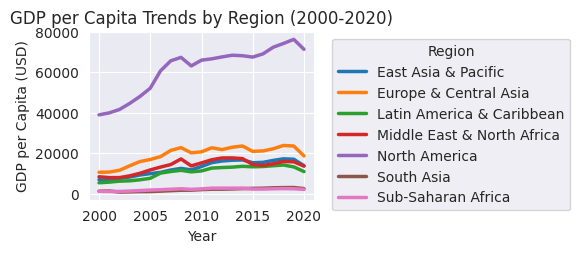

In [15]:
# 1. Line Chart - GDP Trends Over Time
plt.subplot(2, 2, 1)
gdp_trend = df_cleaned.groupby(['year', 'region'])['gdp_per_capita'].mean().unstack()
gdp_trend.plot(ax=plt.gca(), linewidth=2.5)
plt.title('GDP per Capita Trends by Region (2000-2020)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('GDP per Capita (USD)', fontsize=10)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

<ipython-input-16-766ad089593c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=life_exp.values, y=life_exp.index, palette="viridis")


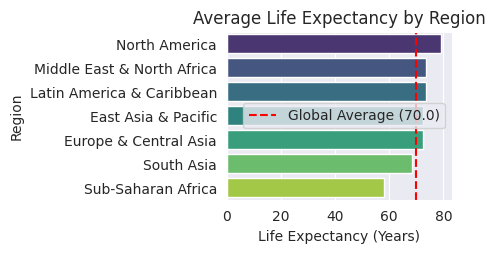

In [16]:
# 2. Bar Chart - Life Expectancy Comparison
plt.subplot(2, 2, 2)
life_exp = df_cleaned.groupby('region')['life_expectancy'].mean().sort_values(ascending=False)
sns.barplot(x=life_exp.values, y=life_exp.index, palette="viridis")
plt.title('Average Life Expectancy by Region', fontsize=12)
plt.xlabel('Life Expectancy (Years)', fontsize=10)
plt.ylabel('Region', fontsize=10)
plt.axvline(x=df_cleaned['life_expectancy'].mean(), color='red', linestyle='--',
            label=f'Global Average ({df_cleaned["life_expectancy"].mean():.1f})')
plt.legend()

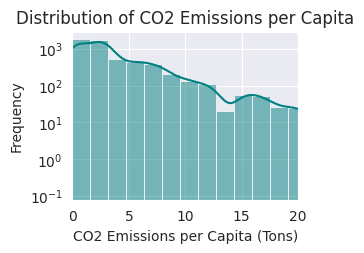

In [17]:
# 3. Histogram - CO2 Emissions Distribution
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['co2_emissions_per_capita_tons'], bins=30, kde=True, color='teal')
plt.title('Distribution of CO2 Emissions per Capita', fontsize=12)
plt.xlabel('CO2 Emissions per Capita (Tons)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xlim(0, 20)  # Focus on majority of data
plt.yscale('log')  # For better visualization of skewed data

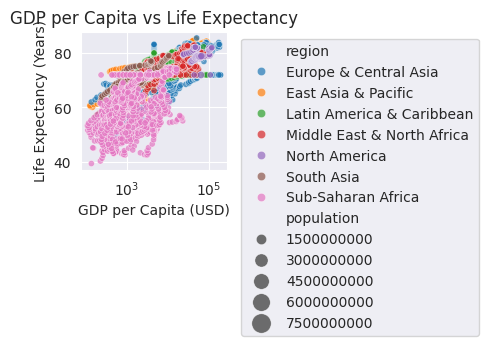

In [18]:
# 4. Scatter Plot - GDP vs Life Expectancy
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_cleaned, x='gdp_per_capita', y='life_expectancy',
                hue='region', size='population', sizes=(20, 200), alpha=0.7)
plt.title('GDP per Capita vs Life Expectancy', fontsize=12)
plt.xlabel('GDP per Capita (USD)', fontsize=10)
plt.ylabel('Life Expectancy (Years)', fontsize=10)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()